In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *
df = pd.read_csv("smoking_train.csv")
test = pd.read_csv("smoking_test.csv")
pd.set_option('display.max_rows', 20)
print(df.shape)
df

(44554, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,55673,F,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,no
44550,55681,F,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,no
44551,55683,F,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,no
44552,55684,M,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,no


In [2]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'oral', 'tartar', 'smoking'], dtype='object')

In [3]:
print(*df['gender'].unique())
print(*df['oral'].unique())
print(*df['tartar'].unique())
print(*df['smoking'].unique())
print(*test['oral'].unique())

M F
Y
N Y
yes no
Y


In [4]:
df = df.join(pd.get_dummies(df.gender).astype(int))
print(df['oral'].isna().sum())
df = df.drop(columns=['oral', 'gender'])

test = test.join(pd.get_dummies(test.gender).astype(int))
test = test.drop(columns=['oral', 'gender'])

0


In [5]:
df['tartar'] = df['tartar'].astype(str).map(lambda x : 0 if x == 'N' else 1)
df['smoking'] = df['smoking'].astype(str).map(lambda x : 0 if x == 'no' else 1)
pd.set_option('display.max_columns', None)
df = df.drop(columns=['ID'])
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,F,M
0,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,0,1
1,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0,0,1
2,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,1,0
3,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0,0,1
4,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,60.0,150,50.0,75.0,1.0,1.2,1.0,1.0,102.0,60.0,85.0,179.0,53.0,52.0,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,1,0,1,0
44550,45.0,160,50.0,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0,1,0
44551,55.0,160,50.0,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,1,0
44552,60.0,165,60.0,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0,1


In [6]:
#
test['tartar'] = test['tartar'].astype(str).map(lambda x : 0 if x == 'N' else 1)
#test = test.drop(columns=['ID'])

In [7]:
df['smoking'].value_counts(normalize=1)

0    0.632266
1    0.367734
Name: smoking, dtype: float64

In [8]:
df.isna().sum()

age               440
height(cm)          0
weight(kg)         44
waist(cm)           0
eyesight(left)      0
                 ... 
dental caries       0
tartar              0
smoking             0
F                   0
M                   0
Length: 26, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

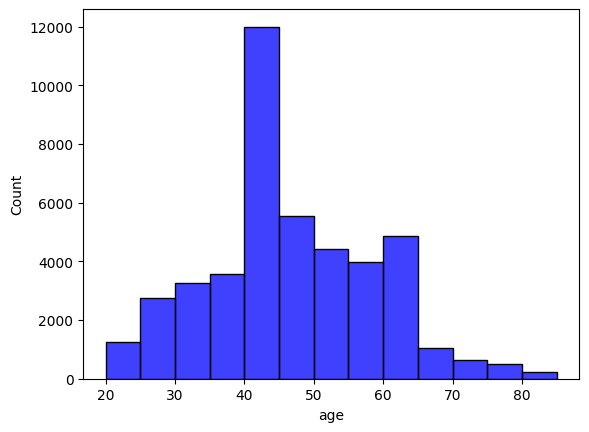

In [9]:
sns.histplot((df['age']),bins=13,color="blue")

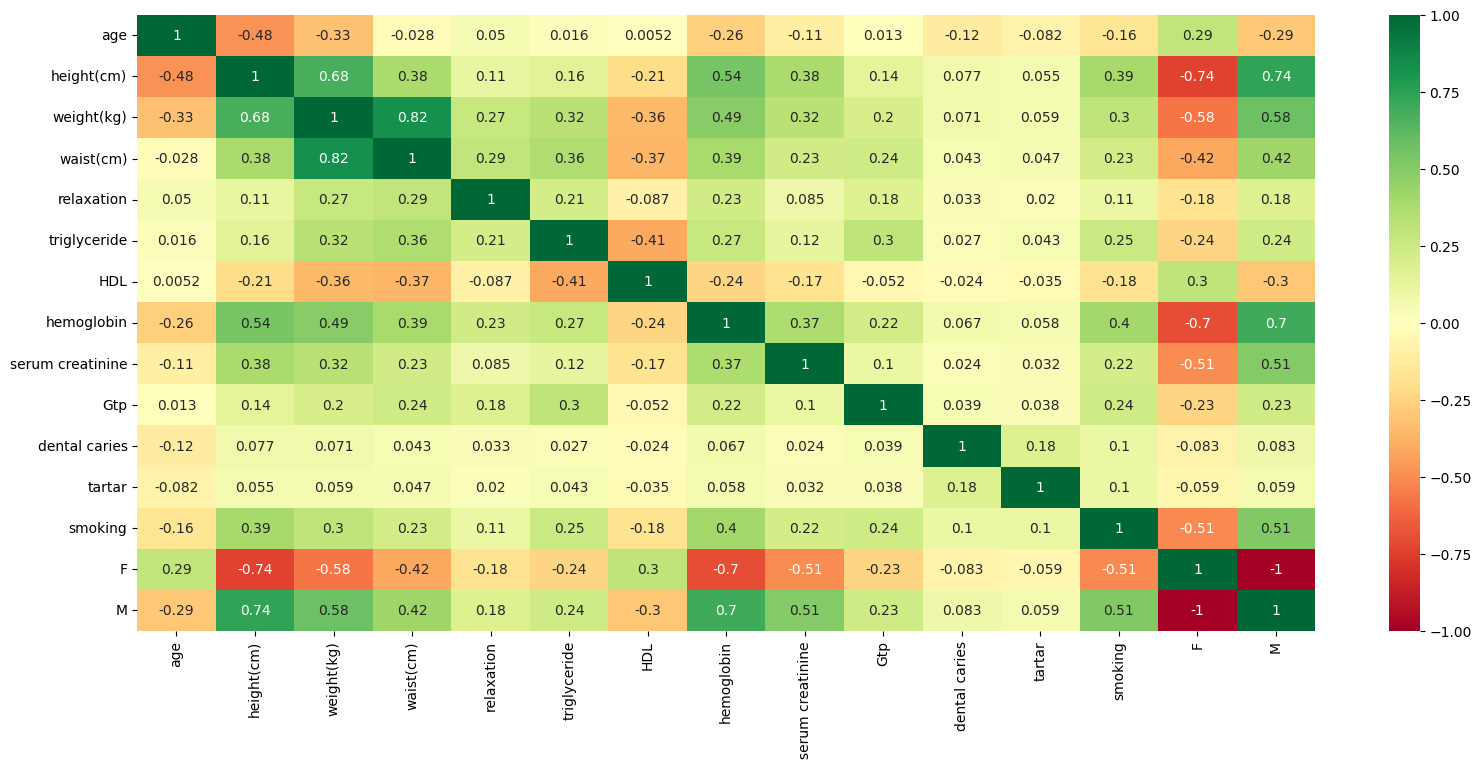

In [10]:
corr_df = df.corr()
low_corr_columns = corr_df[abs(corr_df['smoking']) <0.1].index
plt.subplots(figsize=(19, 8))
sns.heatmap(df.drop(columns=low_corr_columns).corr(), xticklabels=df.drop(columns=low_corr_columns).corr().columns, yticklabels=df.drop(columns=low_corr_columns).corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.2g')
plt.show()

<Axes: xlabel='weight(kg)', ylabel='Count'>

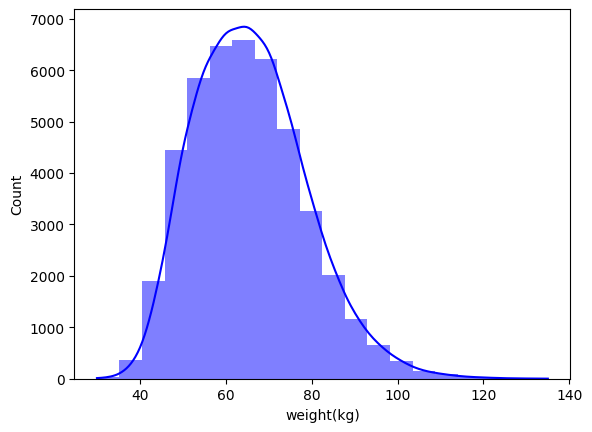

In [11]:
sns.histplot(df['weight(kg)'], bins=20, color="blue", kde=True, linewidth=0, kde_kws={'bw_adjust': 2})

In [12]:
print(df['weight(kg)'].corr(df['waist(cm)']))

0.8224937022362234


In [28]:
df['waist(cm)'].value_counts()

80.0     1544
82.0     1450
81.0     1390
84.0     1353
86.0     1320
85.0     1298
78.0     1292
83.0     1290
79.0     1204
76.0     1178
77.0     1168
87.0     1165
88.0     1101
75.0     1037
89.0     1020
90.0      952
74.0      933
73.0      888
72.0      842
91.0      774
70.0      757
71.0      710
92.0      690
94.0      594
93.0      563
69.0      553
68.0      547
95.0      469
67.0      457
96.0      401
66.0      391
97.0      380
65.0      297
98.0      294
64.0      235
99.0      230
100.0     186
84.5      170
101.0     165
63.0      165
82.5      164
86.5      156
77.5      151
80.5      151
81.5      150
85.5      139
83.5      138
74.5      133
76.5      131
89.5      131
78.5      130
62.0      127
88.5      127
79.5      125
102.0     123
103.0     122
87.5      120
75.5      110
76.2      107
73.5      106
91.5      102
72.5       99
81.3       99
90.5       96
81.2       96
71.5       96
104.0      91
86.4       90
83.2       88
105.0      87
92.5       87
87.2  

In [13]:
grouped_df = df.groupby('waist(cm)').mean()
fill_values = df['waist(cm)'].map(grouped_df['weight(kg)'])
df['weight(kg)'] = df['weight(kg)'].fillna(value=fill_values)

In [14]:
grouped_df = df.groupby(df[['hearing(left)', 'hearing(right)']].min(axis=1)).mean()
fill_values = df[['hearing(left)', 'hearing(right)']].min(axis=1).map(grouped_df['age'])
df['age'] = df['age'].fillna(value=df['age'].mean())


In [15]:
#
grouped_df = df.groupby('waist(cm)').mean()
fill_values = test['waist(cm)'].map(grouped_df['weight(kg)'])
test['weight(kg)'] = test['weight(kg)'].fillna(value=fill_values)
grouped_df = df.groupby(df[['hearing(left)', 'hearing(right)']].min(axis=1)).mean()
fill_values = test[['hearing(left)', 'hearing(right)']].min(axis=1).map(grouped_df['age'])
test['age'] = test['age'].fillna(value=df['age'].mean())

In [16]:
# corr = df.corr()
# low_corr_columns = corr[abs(corr['smoking']) < 0.1].index
# df = df.drop(low_corr_columns, axis=1)
# test = test.drop(low_corr_columns, axis=1)
# df

In [17]:
A = df[df['smoking'] == 0].mean()
B = df[df['smoking'] == 1].mean()

In [18]:
data = {'not smoking': A, 'smoking': B}
pd.set_option('display.max_rows', None)
df1 = pd.DataFrame(data)
df1

,not smoking,smoking
age,45.670255,41.669094
height(cm),161.877174,169.421387
weight(kg),62.923842,70.950688
waist(cm),80.451857,84.793011
eyesight(left),0.988715,1.052161
eyesight(right),0.984966,1.049042
hearing(left),1.029180,1.020935
hearing(right),1.028896,1.022095
systolic,120.739191,122.769409
relaxation,75.234966,77.409241


In [19]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking', 'F', 'M'],
      dtype='object')

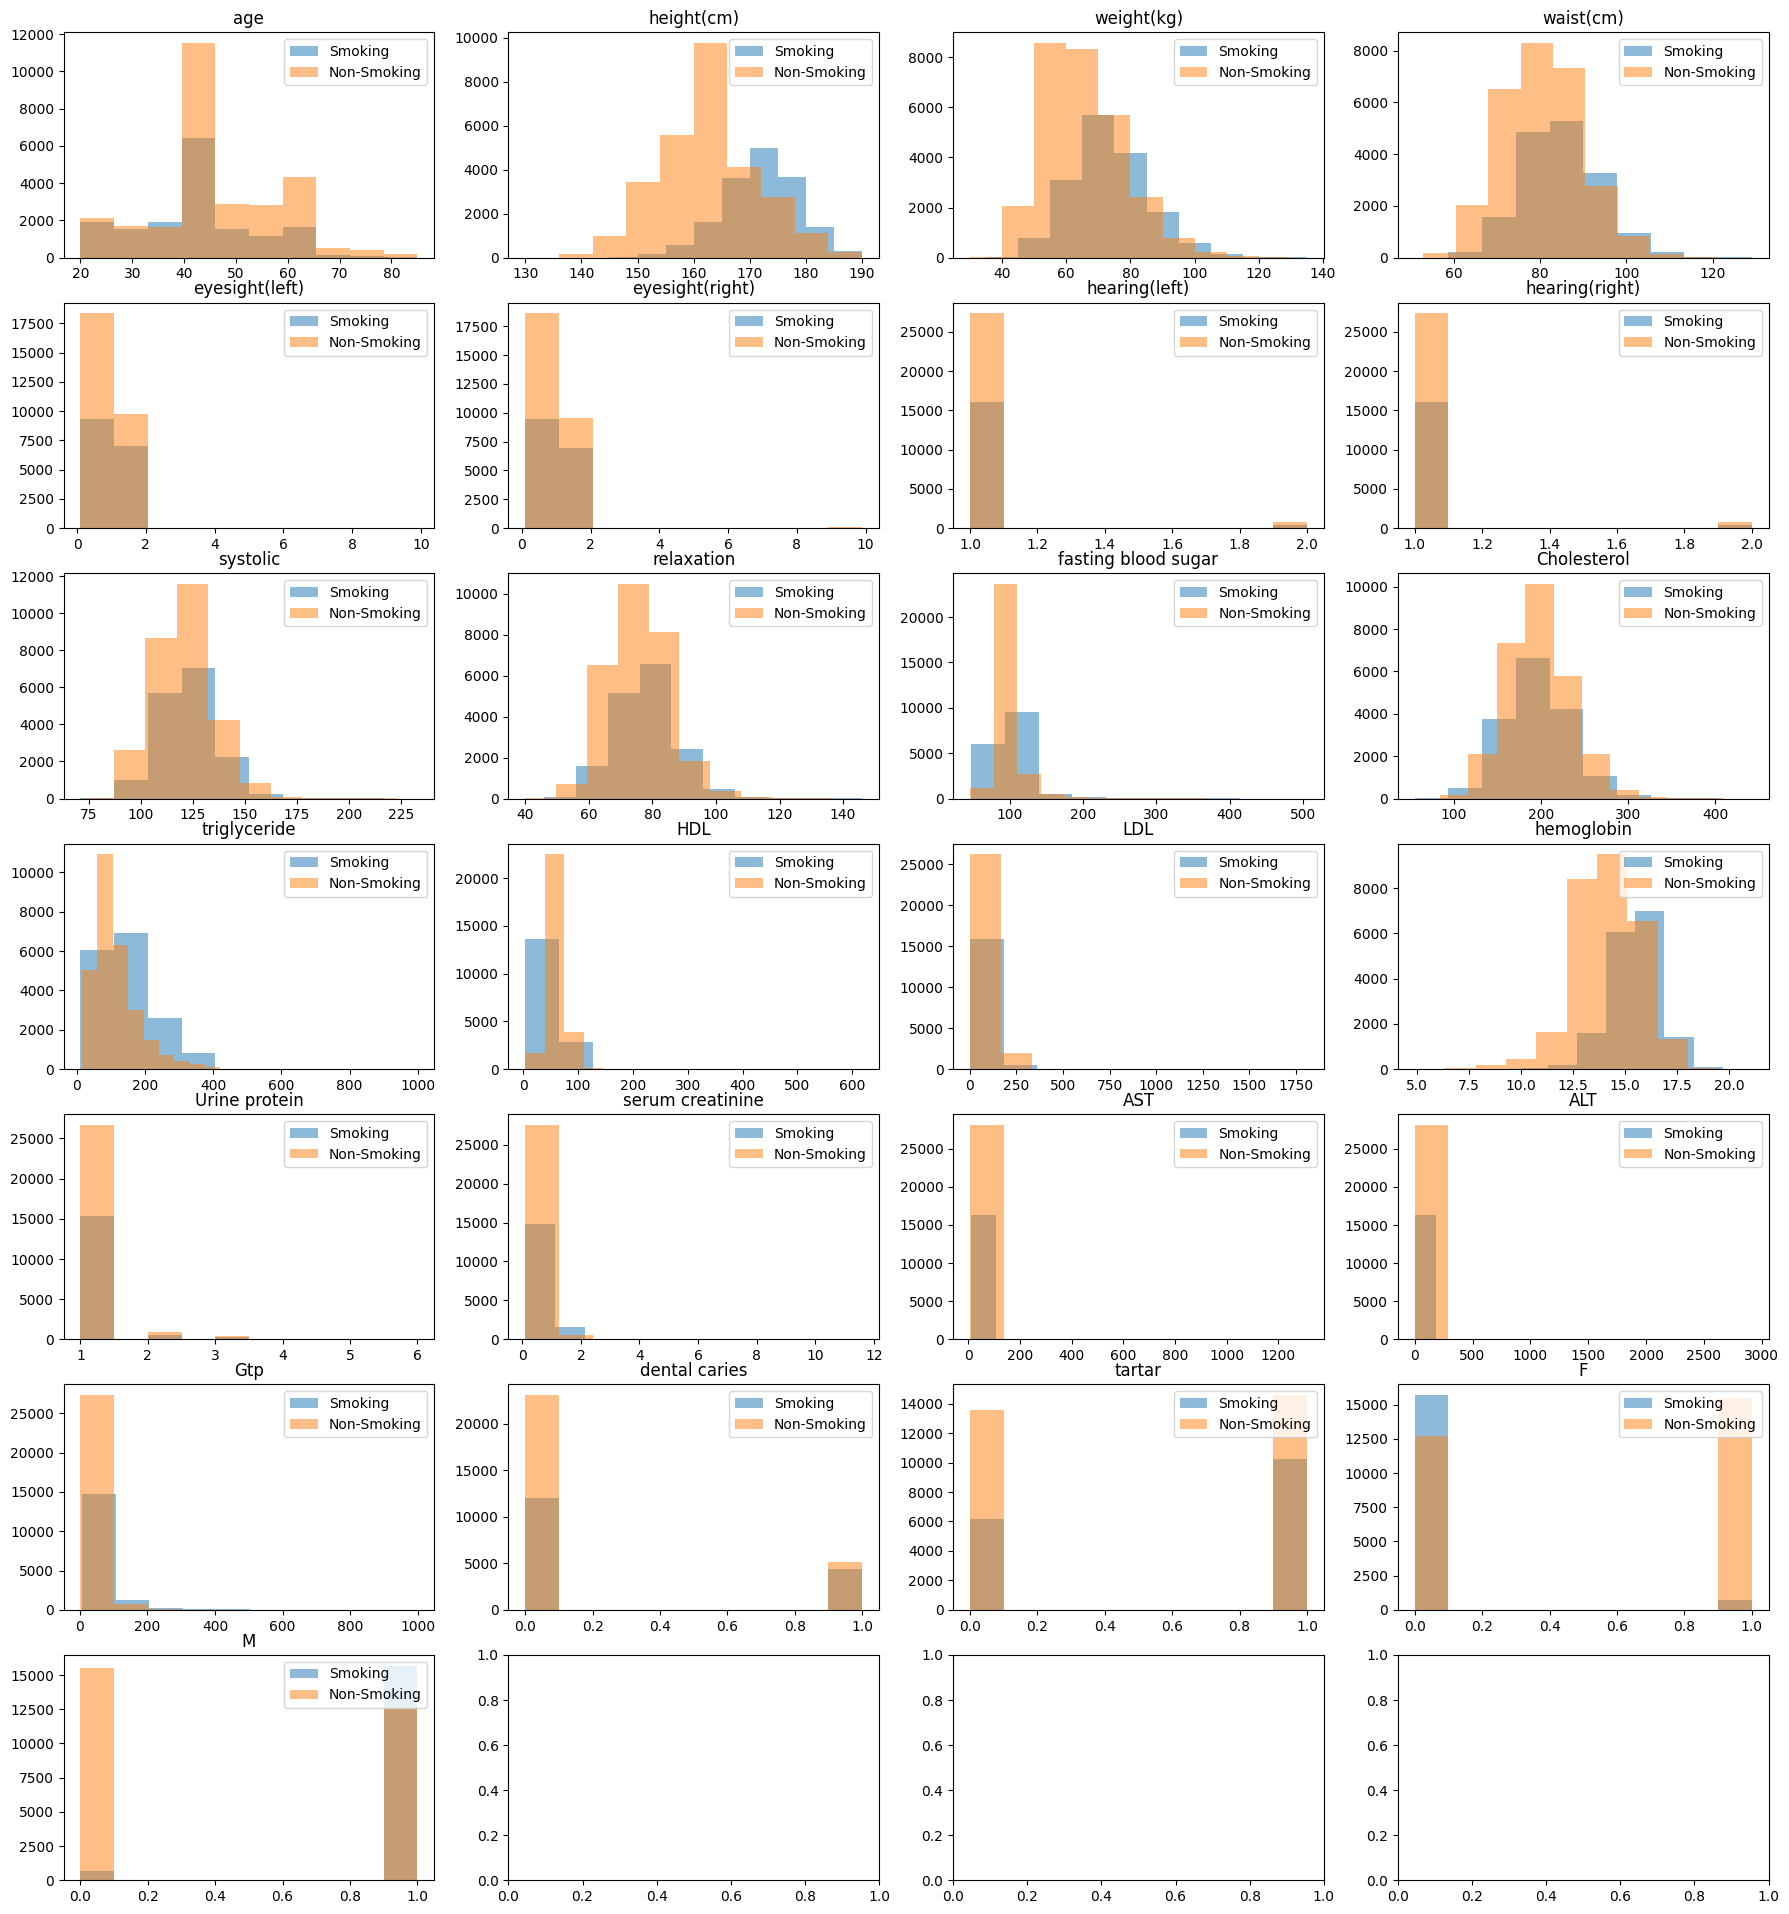

In [20]:
features = df.drop(columns=['smoking']).columns
df_smoking = df[df['smoking'] == 1]
df_non_smoking = df[df['smoking'] == 0]
n_cols = 4
n_rows = int(len(features) / n_cols) + (len(features) % n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(22, 24))

for i, feature in enumerate(features):
    row = int(i / n_cols)
    col = i % n_cols
    axs[row][col].hist(df_smoking[feature], alpha=0.5, label='Smoking')
    axs[row][col].hist(df_non_smoking[feature], alpha=0.5, label='Non-Smoking')
    axs[row][col].legend(loc='upper right')
    axs[row][col].set_title(feature)

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['smoking']), df['smoking'], test_size=0.3, random_state=42)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (31187, 25), (31187,)
Train dataset size: (13367, 25), (13367,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1.0, 10.0],
#     'solver': ['liblinear']
# }
#grid_search = GridSearchCV(logreg, param_grid, cv=5)
# best_model = grid_search.best_estimator_
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

0.7268457078335661


In [24]:
y_pred = logreg.predict(test.drop(columns=['ID']))
y_pred = np.where(y_pred == 1, 'yes', 'no')
ans = pd.DataFrame({'ID': test['ID'], 'smoking': y_pred})
ans.to_csv('ans.csv', index=False)